In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tqdm
import re
from sklearn import preprocessing
import librosa
from imblearn.combine import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn import svm
import pywt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, palette=palette)  # 解决Seaborn中文显示问题

In [64]:
from util import load

df, attachList = load.load(list(range(1, 7 + 1)) + [9])

../3rd天府杯A提/附件9\20.txt: 100%|██████████| 160/160 [00:03<00:00, 50.59it/s]


In [65]:
df

,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,9-11,9-12,9-13,9-14,9-15,9-16,9-17,9-18,9-19,9-20
0,0.031847,0.016663,0.020103,0.005837,-0.011276,-0.025771,0.021692,0.009281,0.010529,0.001247,...,0.093444,-0.039594,0.034525,-0.017206,0.037083,0.014242,-0.005727,0.001487,-0.004651,0.000754
1,-0.011189,-0.002048,0.006537,0.023145,0.012113,-0.017351,0.010933,-0.003817,0.004915,-0.007641,...,-0.098345,-0.065790,0.022830,-0.015803,0.024453,0.000677,-0.000582,0.009907,-0.003247,-0.007198
2,-0.019609,-0.007661,-0.002818,0.003030,0.021468,-0.009866,0.007658,-0.004752,0.003980,-0.002028,...,-0.083844,-0.049886,0.032186,-0.002705,0.038019,-0.008679,0.014387,-0.004594,-0.002780,-0.005327
3,0.019685,0.007308,-0.002351,-0.019423,0.004160,-0.003318,0.005787,-0.018318,-0.022216,-0.028223,...,0.122446,0.003441,0.058382,0.015070,0.046439,0.006290,-0.005260,0.001954,-0.003247,0.011045
4,-0.020076,0.001226,-0.020594,0.016596,0.013048,-0.015948,-0.000294,-0.023931,0.003045,-0.024481,...,0.131334,-0.002640,0.060253,0.030507,0.049245,-0.009614,0.004564,0.000083,-0.017748,-0.010472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-2.936200,1.122488,1.303684,-0.291669,-0.145528,0.035976,0.138636,-0.077726,0.077889,-0.176508,...,7.072680,0.896428,0.855474,-0.456449,-0.032148,0.131654,-0.293878,0.063701,0.110423,-1.465260
7996,-3.392283,2.000974,0.883152,-0.199985,0.457904,0.205311,0.186349,-0.010833,0.116246,-0.133005,...,5.946740,-2.363980,0.868572,-0.477967,-0.014840,0.351510,-0.117994,0.176903,0.114165,-1.481632
7997,-2.868840,1.194994,0.248846,0.020338,0.813415,0.481300,0.176526,-0.000075,0.141039,-0.115230,...,3.495588,-5.519137,0.892896,-0.539246,-0.015308,0.576511,0.027017,0.240989,0.117439,-1.503617
7998,-2.935732,-0.888954,-0.528132,0.284164,0.943457,0.712382,0.149862,-0.014108,0.181735,-0.082953,...,0.451293,-7.890768,0.886815,-0.575732,-0.023728,0.787946,0.161269,0.239118,0.108551,-1.546653


In [68]:
def 数据探索(col: str):
    x = df[col]
    # sns.lineplot(x)
    # plt.show()

    # 进行小波变换
    coeffs = pywt.wavedec(x, 'morl')

    # 绘制小波系数和逼近系数
    # plt.figure(figsize=(10, 6))
    # for i, coeff in enumerate(coeffs):
    #     plt.subplot(len(coeffs), 1, i + 1)
    #     plt.plot(coeff)
    #     plt.ylabel(f'Level {i + 1}')
    #
    # plt.xlabel('Sample')
    # plt.tight_layout()
    # plt.show()


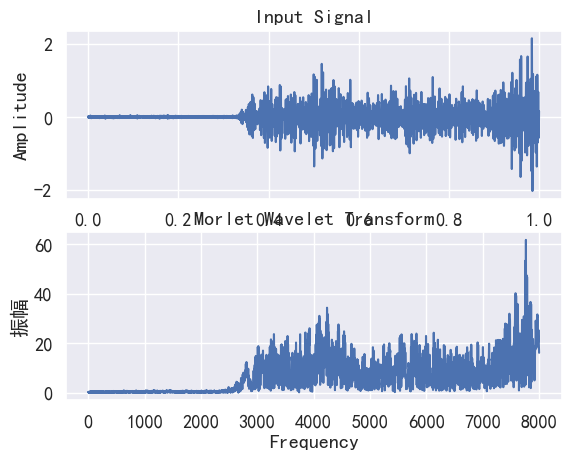

In [151]:
import numpy as np
from scipy.signal import morlet

# 生成示例信号
fs = df.shape[0]  # 采样率
t = np.arange(0, 1, 1 / fs)  # 时间向量
x = df['2-1']

# 进行Morlet小波变换
freqs = np.arange(1, fs + 1, 1)  # 感兴趣的频率范围
wavelet = morlet(fs, freqs)  # 获取Morlet小波
transformed = np.convolve(x, wavelet, mode='same')  # 进行卷积操作

# 绘制结果
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freqs, np.abs(transformed))
plt.xlabel('Frequency')
plt.ylabel('振幅')
plt.title('Morlet Wavelet Transform')
plt.show()


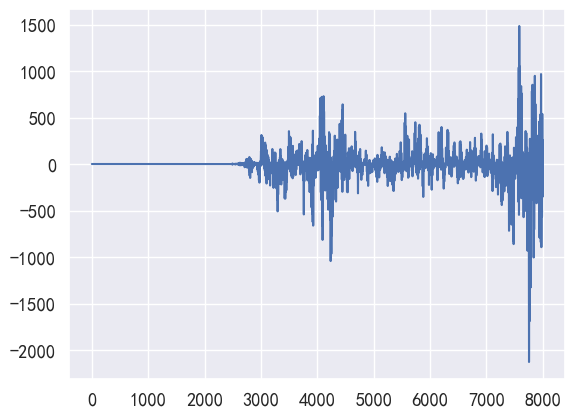

In [152]:
sns.lineplot(np.real(np.power(transformed, 2)))
plt.show()